In [1]:

import pickle
import numpy as np
from numpy import *
import xarray as xr
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
#masking
mice_files =  "//home/madhumadi/bcsd_bcsrcnn/NorESM1_M/raw_gcm/NorESM1_rcp_85_wo_preprocessing_2006_2100.nc"
observed = '/home/madhumadi/sd/s_data/nc_files/precipitation_India_obs.nc'
obs=xr.open_dataset(observed)
model=xr.open_dataset(mice_files)

In [2]:
model

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 144, time: 34675)
Coordinates:
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * time       (time) object 2006-01-01 12:00:00 ... 2100-12-31 12:00:00
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    time_bnds  (time, bnds) object ...
    pr         (time, lat, lon) float32 ...
Attributes:
    CDI:                    Climate Data Interface version ?? (http://mpimet....
    Conventions:            CF-1.4
    history:                Mon Jul 15 23:05:29 2019: cdo mergetime pr_day_No...
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          rcp85
    model_id:               NorESM1-M
    forcing:            

In [3]:
model['pr'][0].plot()

In [4]:
model

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 144, time: 34675)
Coordinates:
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * time       (time) object 2006-01-01 12:00:00 ... 2100-12-31 12:00:00
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    time_bnds  (time, bnds) object ...
    pr         (time, lat, lon) float32 ...
Attributes:
    CDI:                    Climate Data Interface version ?? (http://mpimet....
    Conventions:            CF-1.4
    history:                Mon Jul 15 23:05:29 2019: cdo mergetime pr_day_No...
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          rcp85
    model_id:               NorESM1-M
    forcing:            

In [5]:
v = obs['precipitation (mm)'].sel(time = slice('1920-01-01','2005-12-31'))

In [6]:
v

<xarray.DataArray 'precipitation (mm)' (time: 31412, lat: 129, lon: 135)>
[547039980 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 1920-01-01 1920-01-02 ... 2005-12-31

In [7]:
v1 = model['pr']#.sel( time = slice('1920-01-01','2005-12-31'))

In [8]:
v1#[0][0][0]

<xarray.DataArray 'pr' (time: 34675, lat: 96, lon: 144)>
[479347200 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * time     (time) object 2006-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    units:             kg m-2 s-1
    comment:           at surface; includes both liquid and solid phases from...
    original_name:     PRECT
    cell_methods:      time: mean
    history:           2011-06-05T18:53:11Z altered by CMOR: Converted type f...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [9]:

(60*60*24)

86400

In [10]:
v2=v1*(60*60*24)

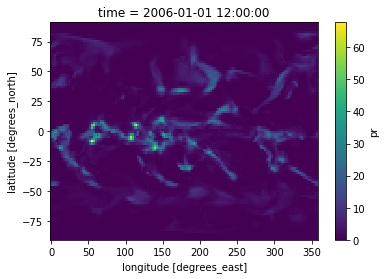

In [11]:
import pylab as plt
xr.plot.imshow(v2[0])
plt.show()

In [12]:
masker=obs['precipitation (mm)'][1,:,:]
mask=xr.where(masker>=0,1,np.nan)
#mask=mask.rename({'precipitation (mm)','PRECT'})
ma=mask

In [13]:
interpolated = v2.interp_like(mask)

In [14]:
masked = interpolated*mask

In [15]:
v

<xarray.DataArray 'precipitation (mm)' (time: 31412, lat: 129, lon: 135)>
[547039980 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 1920-01-01 1920-01-02 ... 2005-12-31

In [16]:
masked

<xarray.DataArray (time: 34675, lat: 129, lon: 135)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 2006-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0

In [17]:
m=v.sel(time=~((v.time.dt.month == 2) & (v.time.dt.day == 29)))

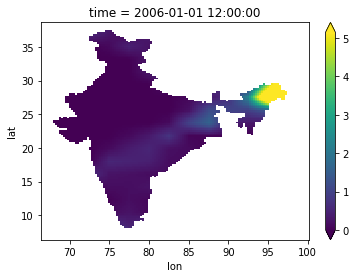

In [18]:
xr.plot.imshow(masked[0],robust=True)

In [19]:
masked.attrs['name'] = 'NorESM1_rcp_85'
masked.attrs['units'] = 'mm/day'
masked

<xarray.DataArray (time: 34675, lat: 129, lon: 135)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 2006-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
Attributes:
    name:     NorESM1_rcp_85
    units:    mm/day

In [20]:
masked.to_netcdf('/home/madhumadi/bcsd_bcsrcnn/NorESM1_M/preprocessed_gcm/NorESM1_2006_2100_preprocessed_rcp_85.nc')

In [21]:
pwd

'/home/madhumadi/sd'

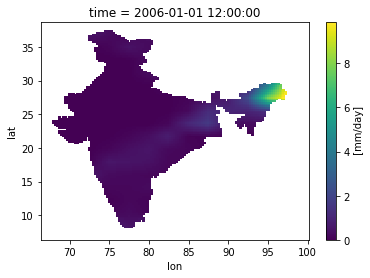

In [22]:
masked[0].plot()

In [25]:
pwd

'/home/madhumadi/sd'

In [26]:
new_data = xr.where(masked < 0, 0, masked)

In [101]:
new_data.to_netcdf('cliped_obs_1920_to_2005.nc')

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

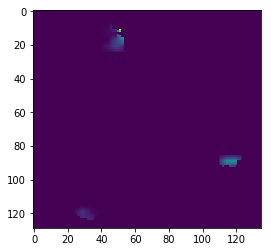

In [106]:
plt.imshow(new_data[0].fillna(0))
plt.colorbar

In [103]:
np.max(v)

<xarray.DataArray 'precipitation (mm)' ()>
array(939.4, dtype=float32)